In [595]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = "/Users/jialing/Desktop/clean/dirty_cafe_sales.xlsx"
df= pd.read_excel(path)

In [596]:
df.head()

df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [597]:
true_prices = df.groupby("Item")["Price Per Unit"].agg(lambda x: x.mode().iloc[0])
true_prices

Item
Cake        3.0
Coffee      2.0
Cookie      1.0
ERROR       3.0
Juice       3.0
Salad       5.0
Sandwich    4.0
Smoothie    4.0
Tea         1.5
UNKNOWN     3.0
Name: Price Per Unit, dtype: float64

In [598]:
mask = df["Total Spent"].notnull() & df["Quantity"].notnull()
df.loc[mask, "Price Per Unit"] = df.loc[mask, "Total Spent"] / df.loc[mask, "Quantity"]

df.loc[df['Item'].isnull() & (df['Price Per Unit'] == 1), "Item"] = "Cookie"
df.loc[df['Item'].isnull() & (df['Price Per Unit'] == 1.5), "Item"] = "Tea"
df.loc[df['Item'].isnull() & (df['Price Per Unit'] == 2), "Item"] = "Coffee"
df.loc[df['Item'].isnull() & (df['Price Per Unit'] == 5), "Item"] = "Salad"
df.loc[df['Item'].isnull() & (df['Price Per Unit'] == 3), "Item"] = "Cake or Juice"
df.loc[df['Item'].isnull() & (df['Price Per Unit'] == 4), "Item"] = "Sandwich or Smoothie"


df.loc[df.Item.isnull()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,44966
9819,TXN_1208561,NaN,NaN,NaN,20.0,Credit Card,NaN,45157


In [599]:
df.dropna(subset=['Item'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9998 non-null   object 
 1   Item              9998 non-null   object 
 2   Quantity          9520 non-null   float64
 3   Price Per Unit    9962 non-null   float64
 4   Total Spent       9497 non-null   float64
 5   Payment Method    7419 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9839 non-null   object 
dtypes: float64(3), object(5)
memory usage: 703.0+ KB


In [600]:
mask = df["Item"].notnull() & df["Price Per Unit"].notnull()
df.loc[mask, "Total Spent"] = df.loc[mask, "Price Per Unit"] * df.loc[mask, "Quantity"]

In [601]:
mask2 = df['Total Spent'].isnull()
df.loc[mask2]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,NaN,4.0,NaN,Cash,In-store,45020
55,TXN_5522862,Cookie,NaN,1.0,NaN,Credit Card,Takeaway,45004
57,TXN_2080895,Cake,NaN,3.0,NaN,Digital Wallet,In-store,45035
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,45219
66,TXN_8501819,Juice,NaN,3.0,NaN,Cash,NaN,45015
...,...,...,...,...,...,...,...,...
9932,TXN_8502079,Tea,NaN,1.5,NaN,Cash,NaN,45036
9935,TXN_9778251,Tea,NaN,1.5,NaN,NaN,Takeaway,45239
9944,TXN_7495283,Cake,NaN,3.0,NaN,Credit Card,Takeaway,45030
9957,TXN_6487003,Coffee,NaN,2.0,NaN,Credit Card,Takeaway,45245


In [602]:
df.dropna(subset=['Quantity', 'Total Spent'], how='all', inplace=True)
# Drop only if both qty and total spend is all null

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9537 non-null   object 
 1   Item              9537 non-null   object 
 2   Quantity          9520 non-null   float64
 3   Price Per Unit    9501 non-null   float64
 4   Total Spent       9518 non-null   float64
 5   Payment Method    7087 non-null   object 
 6   Location          6424 non-null   object 
 7   Transaction Date  9386 non-null   object 
dtypes: float64(3), object(5)
memory usage: 670.6+ KB


In [604]:
mask4 = df['Price Per Unit'].isnull()
df.loc[mask4, "Price Per Unit"] = df["Item"].map(true_prices)

In [605]:
mask3 = df["Quantity"].isnull() 
df.loc[mask3, "Quantity"] = df["Total Spent"] / df["Price Per Unit"]

In [606]:
mask5 = df['Total Spent'].isnull()
df.loc[mask5, "Total Spent"] = df["Quantity"] * df["Price Per Unit"]

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9537 non-null   object 
 1   Item              9537 non-null   object 
 2   Quantity          9537 non-null   float64
 3   Price Per Unit    9537 non-null   float64
 4   Total Spent       9537 non-null   float64
 5   Payment Method    7087 non-null   object 
 6   Location          6424 non-null   object 
 7   Transaction Date  9386 non-null   object 
dtypes: float64(3), object(5)
memory usage: 928.6+ KB


In [608]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2184
Credit Card       2173
Cash              2159
ERROR              291
UNKNOWN            280
Name: count, dtype: int64

In [609]:
df['Payment Method'].replace({"ERROR" : "Unsure",
                              "UNKNOWN" : "Unsure"}, inplace = True)
df['Payment Method'].fillna("Unsure", inplace = True)

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_8362/809816091.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [610]:
df['Location'].value_counts()

Location
In-store    2883
Takeaway    2875
ERROR        342
UNKNOWN      324
Name: count, dtype: int64

In [611]:
df['Location'].replace({"ERROR" : "Unsure",
                        "UNKNOWN" : "Unsure"}, inplace = True)
df['Location'].fillna("Unsure", inplace = True)

df['Item'].replace({"ERROR" : "Unsure",
                    "UNKNOWN" : "Unsure"}, inplace = True)

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_8362/946036986.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_8362/946036986.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9537 non-null   object 
 1   Item              9537 non-null   object 
 2   Quantity          9537 non-null   float64
 3   Price Per Unit    9537 non-null   float64
 4   Total Spent       9537 non-null   float64
 5   Payment Method    9537 non-null   object 
 6   Location          9537 non-null   object 
 7   Transaction Date  9386 non-null   object 
dtypes: float64(3), object(5)
memory usage: 928.6+ KB


In [613]:
mask10 = df['Transaction Date'].isnull()
df.loc[mask10, 'Transaction Date']

77      NaN
104     NaN
160     NaN
175     NaN
246     NaN
       ... 
9769    NaN
9833    NaN
9885    NaN
9931    NaN
9988    NaN
Name: Transaction Date, Length: 151, dtype: object

In [614]:
# Dates are stored in Excel format. Convert to datetime.

# Convert object to numeric, coerce errors
df['Transaction Date'] = pd.to_numeric(df['Transaction Date'], errors='coerce')

# Datetime only work on numeric not strings
df['Transaction Date'] = pd.to_datetime(
    df['Transaction Date'],
    unit='d',
    origin='1899-12-30',
    errors='coerce'
)

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9537 non-null   object        
 1   Item              9537 non-null   object        
 2   Quantity          9537 non-null   float64       
 3   Price Per Unit    9537 non-null   float64       
 4   Total Spent       9537 non-null   float64       
 5   Payment Method    9537 non-null   object        
 6   Location          9537 non-null   object        
 7   Transaction Date  9100 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 928.6+ KB


In [616]:
df.dropna(subset = ['Transaction Date'], inplace = True)

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9100 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9100 non-null   object        
 1   Item              9100 non-null   object        
 2   Quantity          9100 non-null   float64       
 3   Price Per Unit    9100 non-null   float64       
 4   Total Spent       9100 non-null   float64       
 5   Payment Method    9100 non-null   object        
 6   Location          9100 non-null   object        
 7   Transaction Date  9100 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 639.8+ KB


In [618]:
# Overview of sales over time 
df['Year'] = df['Transaction Date'].dt.year
df = df[~df['Item'].isin(["Cake or Juice", "Sandwich or Smoothie", "Unsure"])]


In [619]:
agg_plot_byitem = df.groupby(['Item'])['Total Spent'].sum().sort_values().reset_index()
agg_plot_byqty = df.groupby('Item')['Quantity'].sum().sort_values().reset_index()
agg_plot_prices = df.groupby("Item")['Price Per Unit'].mean().sort_values().reset_index()

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_8362/3445952462.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_8362/3445952462.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_8362/3445952462.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




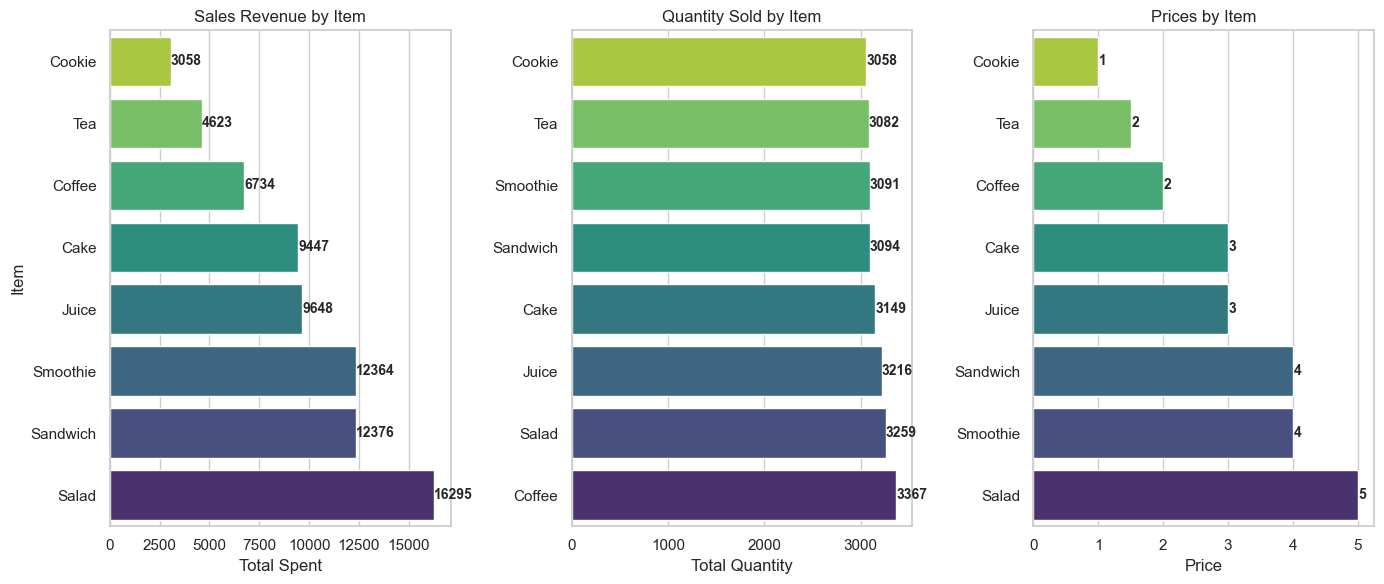

In [620]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))  

bar1 = sns.barplot(data=agg_plot_byitem,y='Item',x='Total Spent',palette='viridis_r',ax=axes[0])
axes[0].set_title("Sales Revenue by Item")
axes[0].set_xlabel("Total Spent")
axes[0].set_ylabel("Item")

# Add labels
for p in bar1.patches:
    width = p.get_width()
    y_pos = p.get_y() + p.get_height()/2
    bar1.text(width - 1, y_pos, f'{round(width)}', va='center', fontsize=10, fontweight='bold')

bar2 = sns.barplot(data=agg_plot_byqty,y='Item',x='Quantity',palette='viridis_r',ax=axes[1])
axes[1].set_title("Quantity Sold by Item")
axes[1].set_xlabel("Total Quantity")
axes[1].set_ylabel("")

# Add labels
for p in bar2.patches:
    width = p.get_width()
    y_pos = p.get_y() + p.get_height()/2
    bar2.text(width - 1, y_pos, f'{round(width)}', va='center', fontsize=10, fontweight='bold')

bar3 = sns.barplot(data=agg_plot_prices, x = "Price Per Unit", y = "Item", palette = 'viridis_r', ax = axes[2])
axes[2].set_title("Prices by Item")
axes[2].set_xlabel("Price")
axes[2].set_ylabel("")

# Add labels
for p in bar3.patches:
    width = p.get_width()
    y_pos = p.get_y() + p.get_height()/2
    bar3.text(width + 0.01, y_pos, f'{round(width)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [621]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=("Sales Revenue by Item", "Quantity Sold by Item"),
    horizontal_spacing=0.15, vertical_spacing=0.15)
fig.add_trace(go.Bar(
    x=agg_plot_byitem['Total Spent'],
    y=agg_plot_byitem['Item'],
    orientation='h',
    marker_color=px.colors.sequential.Viridis,
    text=agg_plot_byitem['Total Spent'],
    textposition='auto'),
    row=1, col=1)

fig.add_trace(go.Bar(
    x=agg_plot_byqty['Quantity'],
    y=agg_plot_byqty['Item'],
    orientation='h',
    marker_color=px.colors.sequential.Viridis,
    text=agg_plot_byqty['Quantity'],
    textposition='auto'),
    row=1, col=2)

fig.add_trace(go.Bar(
    x=agg_plot_prices['Price Per Unit'],
    y=agg_plot_prices['Item'],
    orientation='h',
    marker_color=px.colors.sequential.Viridis,
    text=agg_plot_prices['Price Per Unit'],
    textposition='auto'),
    row=1, col=3)


In [622]:
fig = px.pie(agg_plot_byitem, values='Total Spent', names='Item',title='Sales Revenue Distribution by Item',
    color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_traces(textposition='inside', textinfo='percent+label')  # show percent and label inside slices
fig.show()

In [623]:
# Time series plot of sales
df['Quarter'] = df['Transaction Date'].dt.quarter
monthly_sales_revenue= df.groupby(['Quarter', 'Item'])['Total Spent'].sum().reset_index()
monthly_sales_qty = df.groupby(['Quarter', 'Item'])['Quantity'].sum().reset_index()

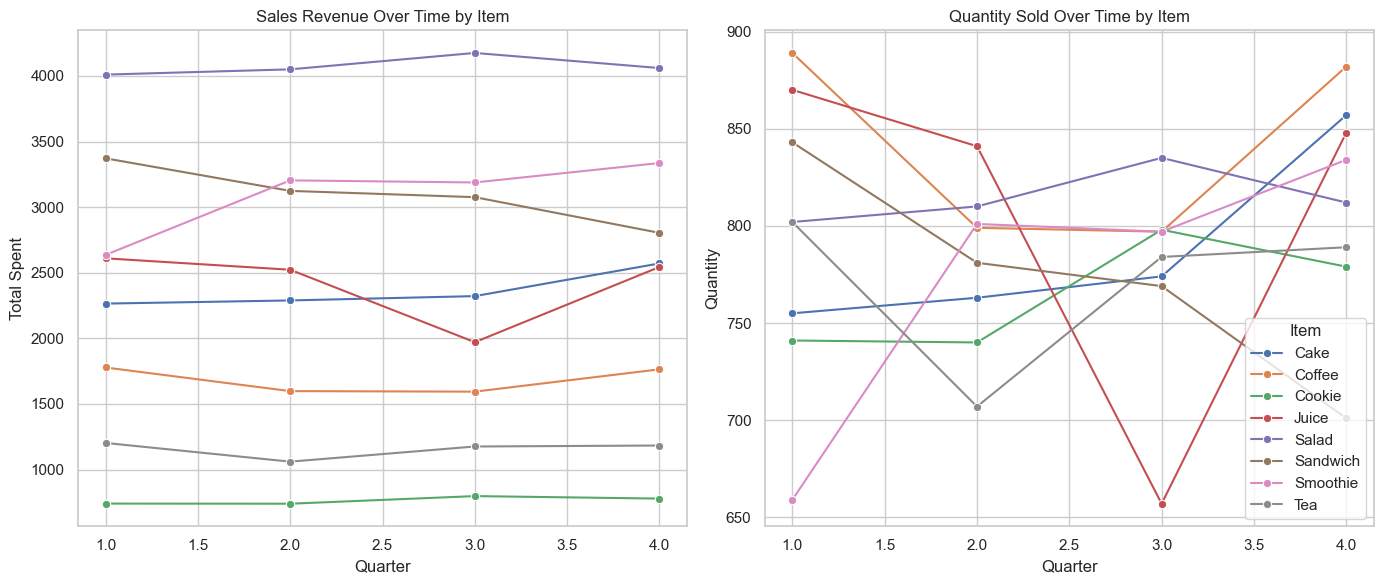

In [625]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.lineplot(data=monthly_sales_revenue,y='Total Spent',x='Quarter',hue = 'Item', marker = 'o', ax=axes[0])
axes[0].set_title("Sales Revenue Over Time by Item")
axes[0].set_xlabel("Quarter")
axes[0].legend_.remove()

sns.lineplot(data=monthly_sales_qty,y='Quantity',x='Quarter',hue = 'Item', marker = 'o', ax=axes[1])
axes[1].set_title("Quantity Sold Over Time by Item")
axes[1].set_xlabel("Quarter")
axes[1].legend(title = 'Item')

plt.tight_layout()
plt.show()

                         

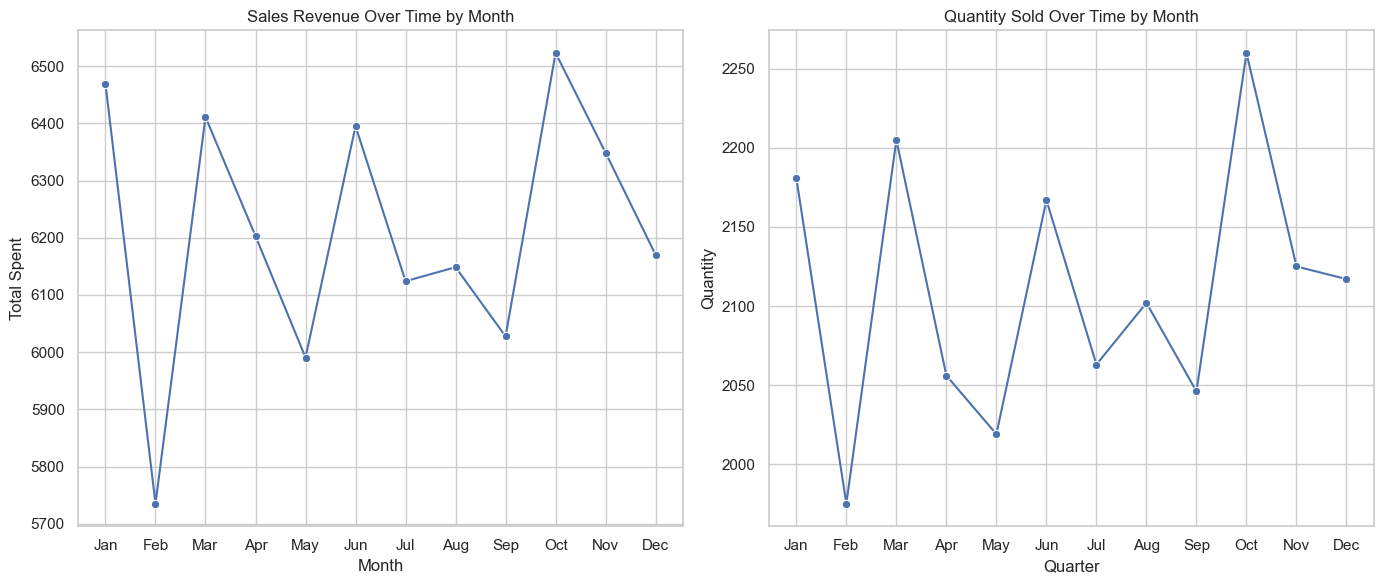

In [626]:
# Overall sales revenue and qty sold over time
# Time series plot of sales
df['Month'] = df['Transaction Date'].dt.strftime('%b')  # 'Jan', 'Feb', etc.
df['Month_Num'] = df['Transaction Date'].dt.month # used for sorting

overall_sales_revenue= df.groupby(['Month_Num', "Month"])['Total Spent'].sum().reset_index()
overall_sales_qty = df.groupby(['Month_Num', "Month"])['Quantity'].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.lineplot(data=overall_sales_revenue,y='Total Spent',x='Month', marker = 'o', ax=axes[0])
axes[0].set_title("Sales Revenue Over Time by Month")
axes[0].set_xlabel("Month")

sns.lineplot(data=overall_sales_qty,y='Quantity',x='Month', marker = 'o', ax=axes[1])
axes[1].set_title("Quantity Sold Over Time by Month")
axes[1].set_xlabel("Quarter")

plt.tight_layout()
plt.show()

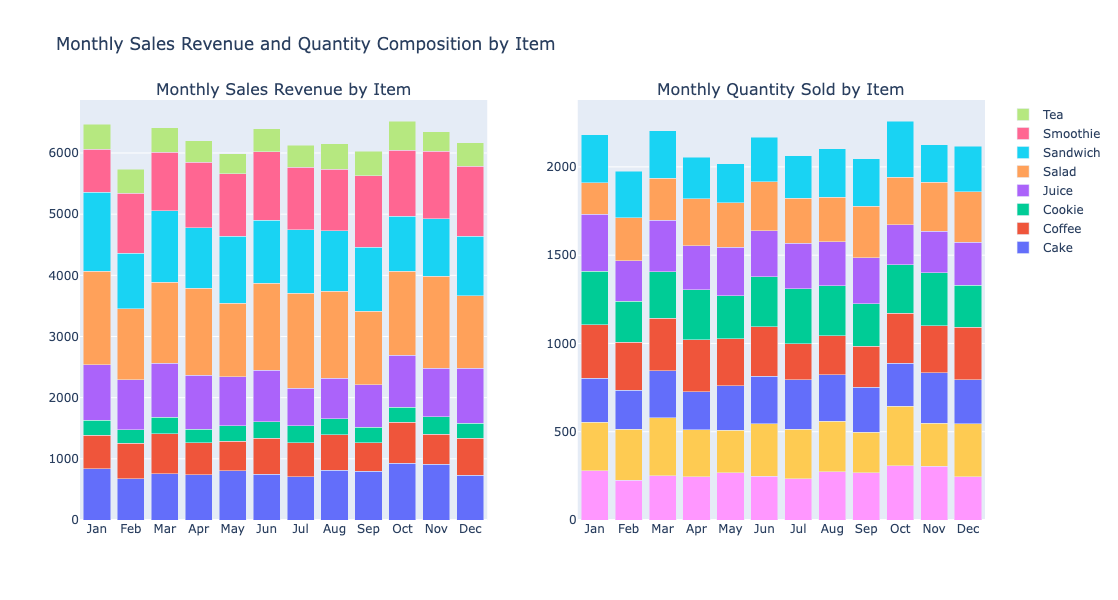

In [643]:
# use plotly~~~ so pretty :D and can scroll on it

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Monthly Sales Revenue by Item", "Monthly Quantity Sold by Item"),
    shared_yaxes=False)

for item in monthly_sales_revenue['Item'].unique():
    item_data = monthly_sales_revenue[monthly_sales_revenue['Item'] == item].sort_values('Month_Num')
    fig.add_trace(go.Bar(
        x=item_data['Month'],
        y=item_data['Total Spent'],
        name=item),
        row=1, col=1)

for item in monthly_sales_qty['Item'].unique():
    item_data = monthly_sales_qty[monthly_sales_qty['Item'] == item].sort_values('Month_Num')
    fig.add_trace(go.Bar(
        x=item_data['Month'],
        y=item_data['Quantity'],
        name=item,
        showlegend=False), # hide duplicate legend
        row=1, col=2)
    
fig.update_layout(
    barmode='stack',        # stacked bars
    height=600, width=1000,
    title_text="Monthly Sales Revenue and Quantity Composition by Item"
)

fig.show()


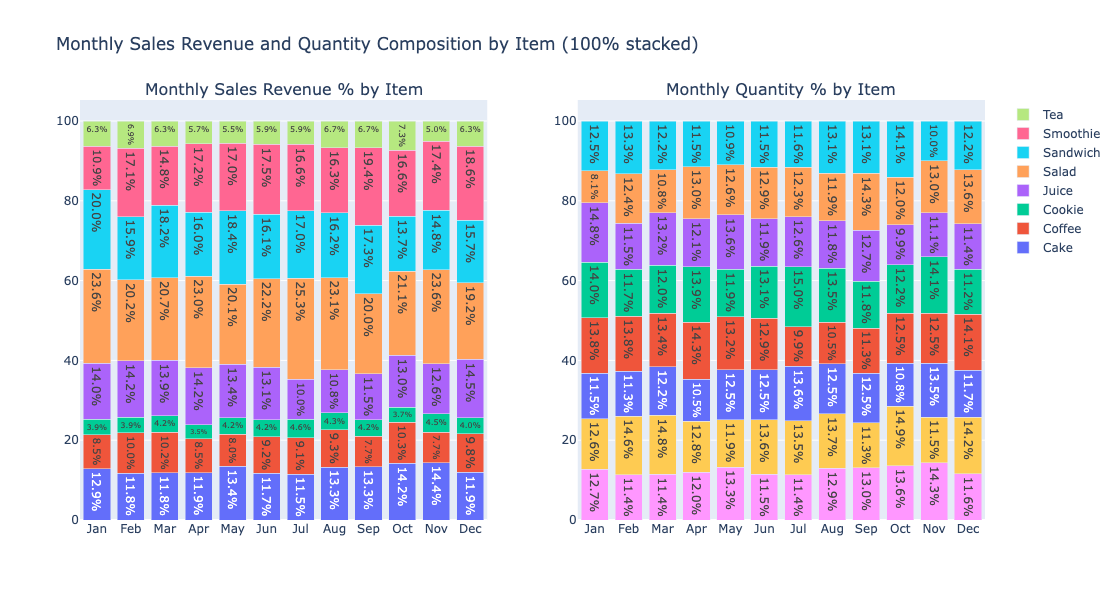

In [645]:
def normalize_to_percent(df, value_col):
    df_percent = df.copy()
    df_percent['Percent'] = df_percent.groupby('Month_Num')[value_col].transform(lambda x: x / x.sum() * 100)
    return df_percent

monthly_sales_revenue_pct = normalize_to_percent(monthly_sales_revenue, 'Total Spent')
monthly_sales_qty_pct = normalize_to_percent(monthly_sales_qty, 'Quantity')

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Monthly Sales Revenue % by Item", "Monthly Quantity % by Item"),
    shared_yaxes=False
)

for item in monthly_sales_revenue_pct['Item'].unique():
    item_data = monthly_sales_revenue_pct[monthly_sales_revenue_pct['Item'] == item].sort_values('Month_Num')
    fig.add_trace(go.Bar(
        x=item_data['Month'],
        y=item_data['Percent'],
        name=item,
        text=[f"{v:.1f}%" for v in item_data['Percent']],
        textposition='inside'
    ), row=1, col=1)

for item in monthly_sales_qty_pct['Item'].unique():
    item_data = monthly_sales_qty_pct[monthly_sales_qty_pct['Item'] == item].sort_values('Month_Num')
    fig.add_trace(go.Bar(
        x=item_data['Month'],
        y=item_data['Percent'],
        name=item,
        text=[f"{v:.1f}%" for v in item_data['Percent']],
        textposition='inside',
        showlegend=False  # hide duplicate legend
    ), row=1, col=2)

fig.update_layout(
    barmode='stack',
    height=600, width=1000,
    title_text="Monthly Sales Revenue and Quantity Composition by Item (100% stacked)",
)

fig.show()


In [ ]:
with pd.ExcelWriter("cleaned_transactions.xlsx") as writer:
    df.to_excel(writer, sheet_name="Cleaned Main Data", index=False)
    monthly_sales_revenue.to_excel(writer, sheet_name="Monthly Revenue", index=False)
    monthly_sales_qty.to_excel(writer, sheet_name="Monthly Quantity", index=False)
